# Stablecoin Liquidity & CEX Accessibility (2019–2024)

This notebook explores how accessible USDT trading was during currency-stressed periods, especially in four countries: **Nigeria, Sudan, Lebanon, and Afghanistan**.

We visualize daily USDT trading volumes on centralized exchanges (CEXs), focusing on:

- Overall volume growth
- Binance dominance
- Whether volume growth coincided with access being granted


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

volume = pd.read_csv("../2_data_preparation/processed/central_exchange_daily_volume_2019-24.csv", parse_dates=["date"])
usdt_volume = volume[volume["asset"].str.upper() == "USDT"]
usdt_volume.head()


,date,exchange,asset,volume_usd
1,2019-01-01,binance,USDT,2.516542e+08
4,2019-01-02,binance,USDT,4.246452e+08
7,2019-01-03,binance,USDT,3.422354e+08
10,2019-01-04,binance,USDT,3.587182e+08
13,2019-01-05,binance,USDT,3.700834e+08


## Total USDT Volume Over Time (All CEXs)

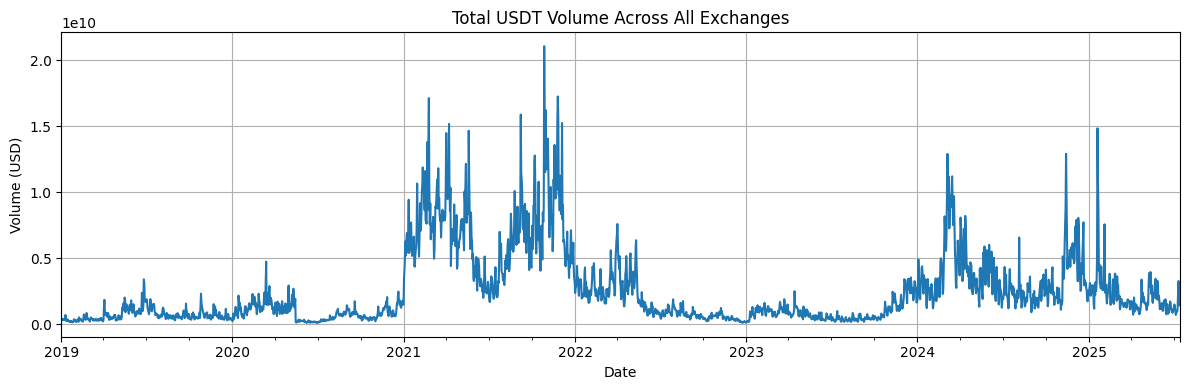

In [2]:
total_volume = usdt_volume.groupby("date")["volume_usd"].sum()
plt.figure(figsize=(12, 4))
total_volume.plot()
plt.title("Total USDT Volume Across All Exchanges")
plt.xlabel("Date")
plt.ylabel("Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Volume Breakdown by Exchange

<Figure size 1400x500 with 0 Axes>

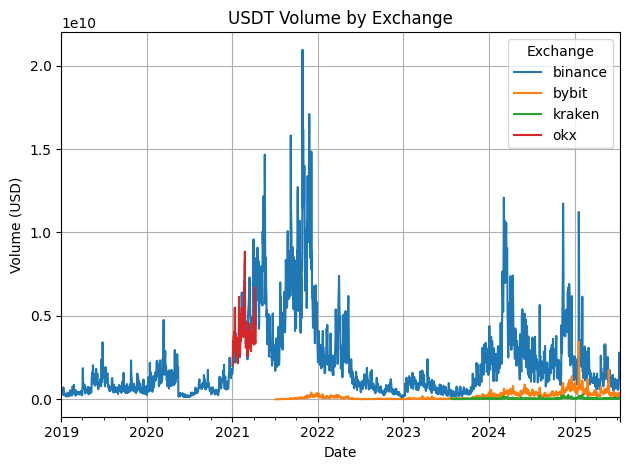

In [3]:
exchange_volume = usdt_volume.pivot_table(index="date", columns="exchange", values="volume_usd", aggfunc="sum")
plt.figure(figsize=(14, 5))
exchange_volume.plot()
plt.title("USDT Volume by Exchange")
plt.ylabel("Volume (USD)")
plt.xlabel("Date")
plt.legend(title="Exchange")
plt.grid(True)
plt.tight_layout()
plt.show()


## Binance Volume with Key Country Access Dates

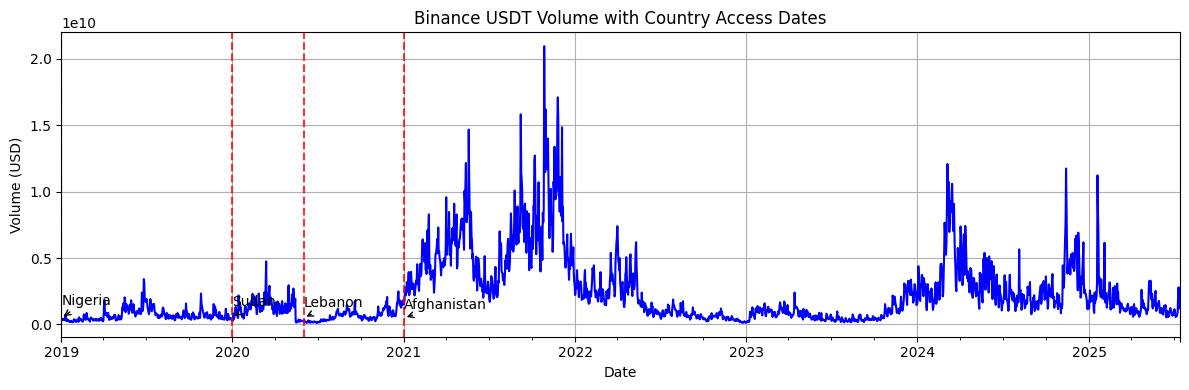

In [4]:
binance = usdt_volume[usdt_volume["exchange"] == "binance"].set_index("date").sort_index()

fig, ax = plt.subplots(figsize=(12, 4))
binance["volume_usd"].plot(ax=ax, label="Binance USDT Volume", color="blue")
ax.set_title("Binance USDT Volume with Country Access Dates")
ax.set_ylabel("Volume (USD)")
ax.set_xlabel("Date")
ax.grid(True)

events = {
    "Nigeria": "2019-01-01",
    "Sudan": "2020-01-01",
    "Lebanon": "2020-06-01",
    "Afghanistan": "2021-01-01"
}

for i, (country, date_str) in enumerate(events.items()):
    date = pd.to_datetime(date_str)
    ax.axvline(date, color="red", linestyle="--", alpha=0.8)
    ax.annotate(
        country,
        xy=(date, 5e8),
        xytext=(date, 1.5e9 - i * 1e8),
        arrowprops=dict(arrowstyle="->", color="black"),
        fontsize=10,
        color="black",
        ha="left"
    )

plt.tight_layout()
plt.show()


## Conclusion

- Binance holds the majority of USDT volume over the 5-year period.
- Countries under currency stress (Sudan, Nigeria, etc.) were granted access between 2019–2021.
- Volume growth in Binance correlates with their broader accessibility in high-demand regions.

These trends support the idea that centralized exchanges like Binance play a major role in global crypto accessibility — especially when fiat systems collapse.
